<a href="https://colab.research.google.com/github/pyloke-web/miscellaneous_projects/blob/main/Sift_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opencv-python==4.6.0.66
!pip install opencv-contrib-python==4.6.0.66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import sys
import cv2
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

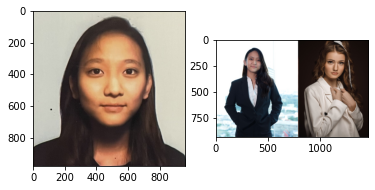

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photo/IMG_4598.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photo/ddbs.jpg')
fig = plt.figure() # parallel display of images
fig.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
fig.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
img_with_kp = None
img_with_kp = cv2.drawKeypoints(img1,kp1,img_with_kp)

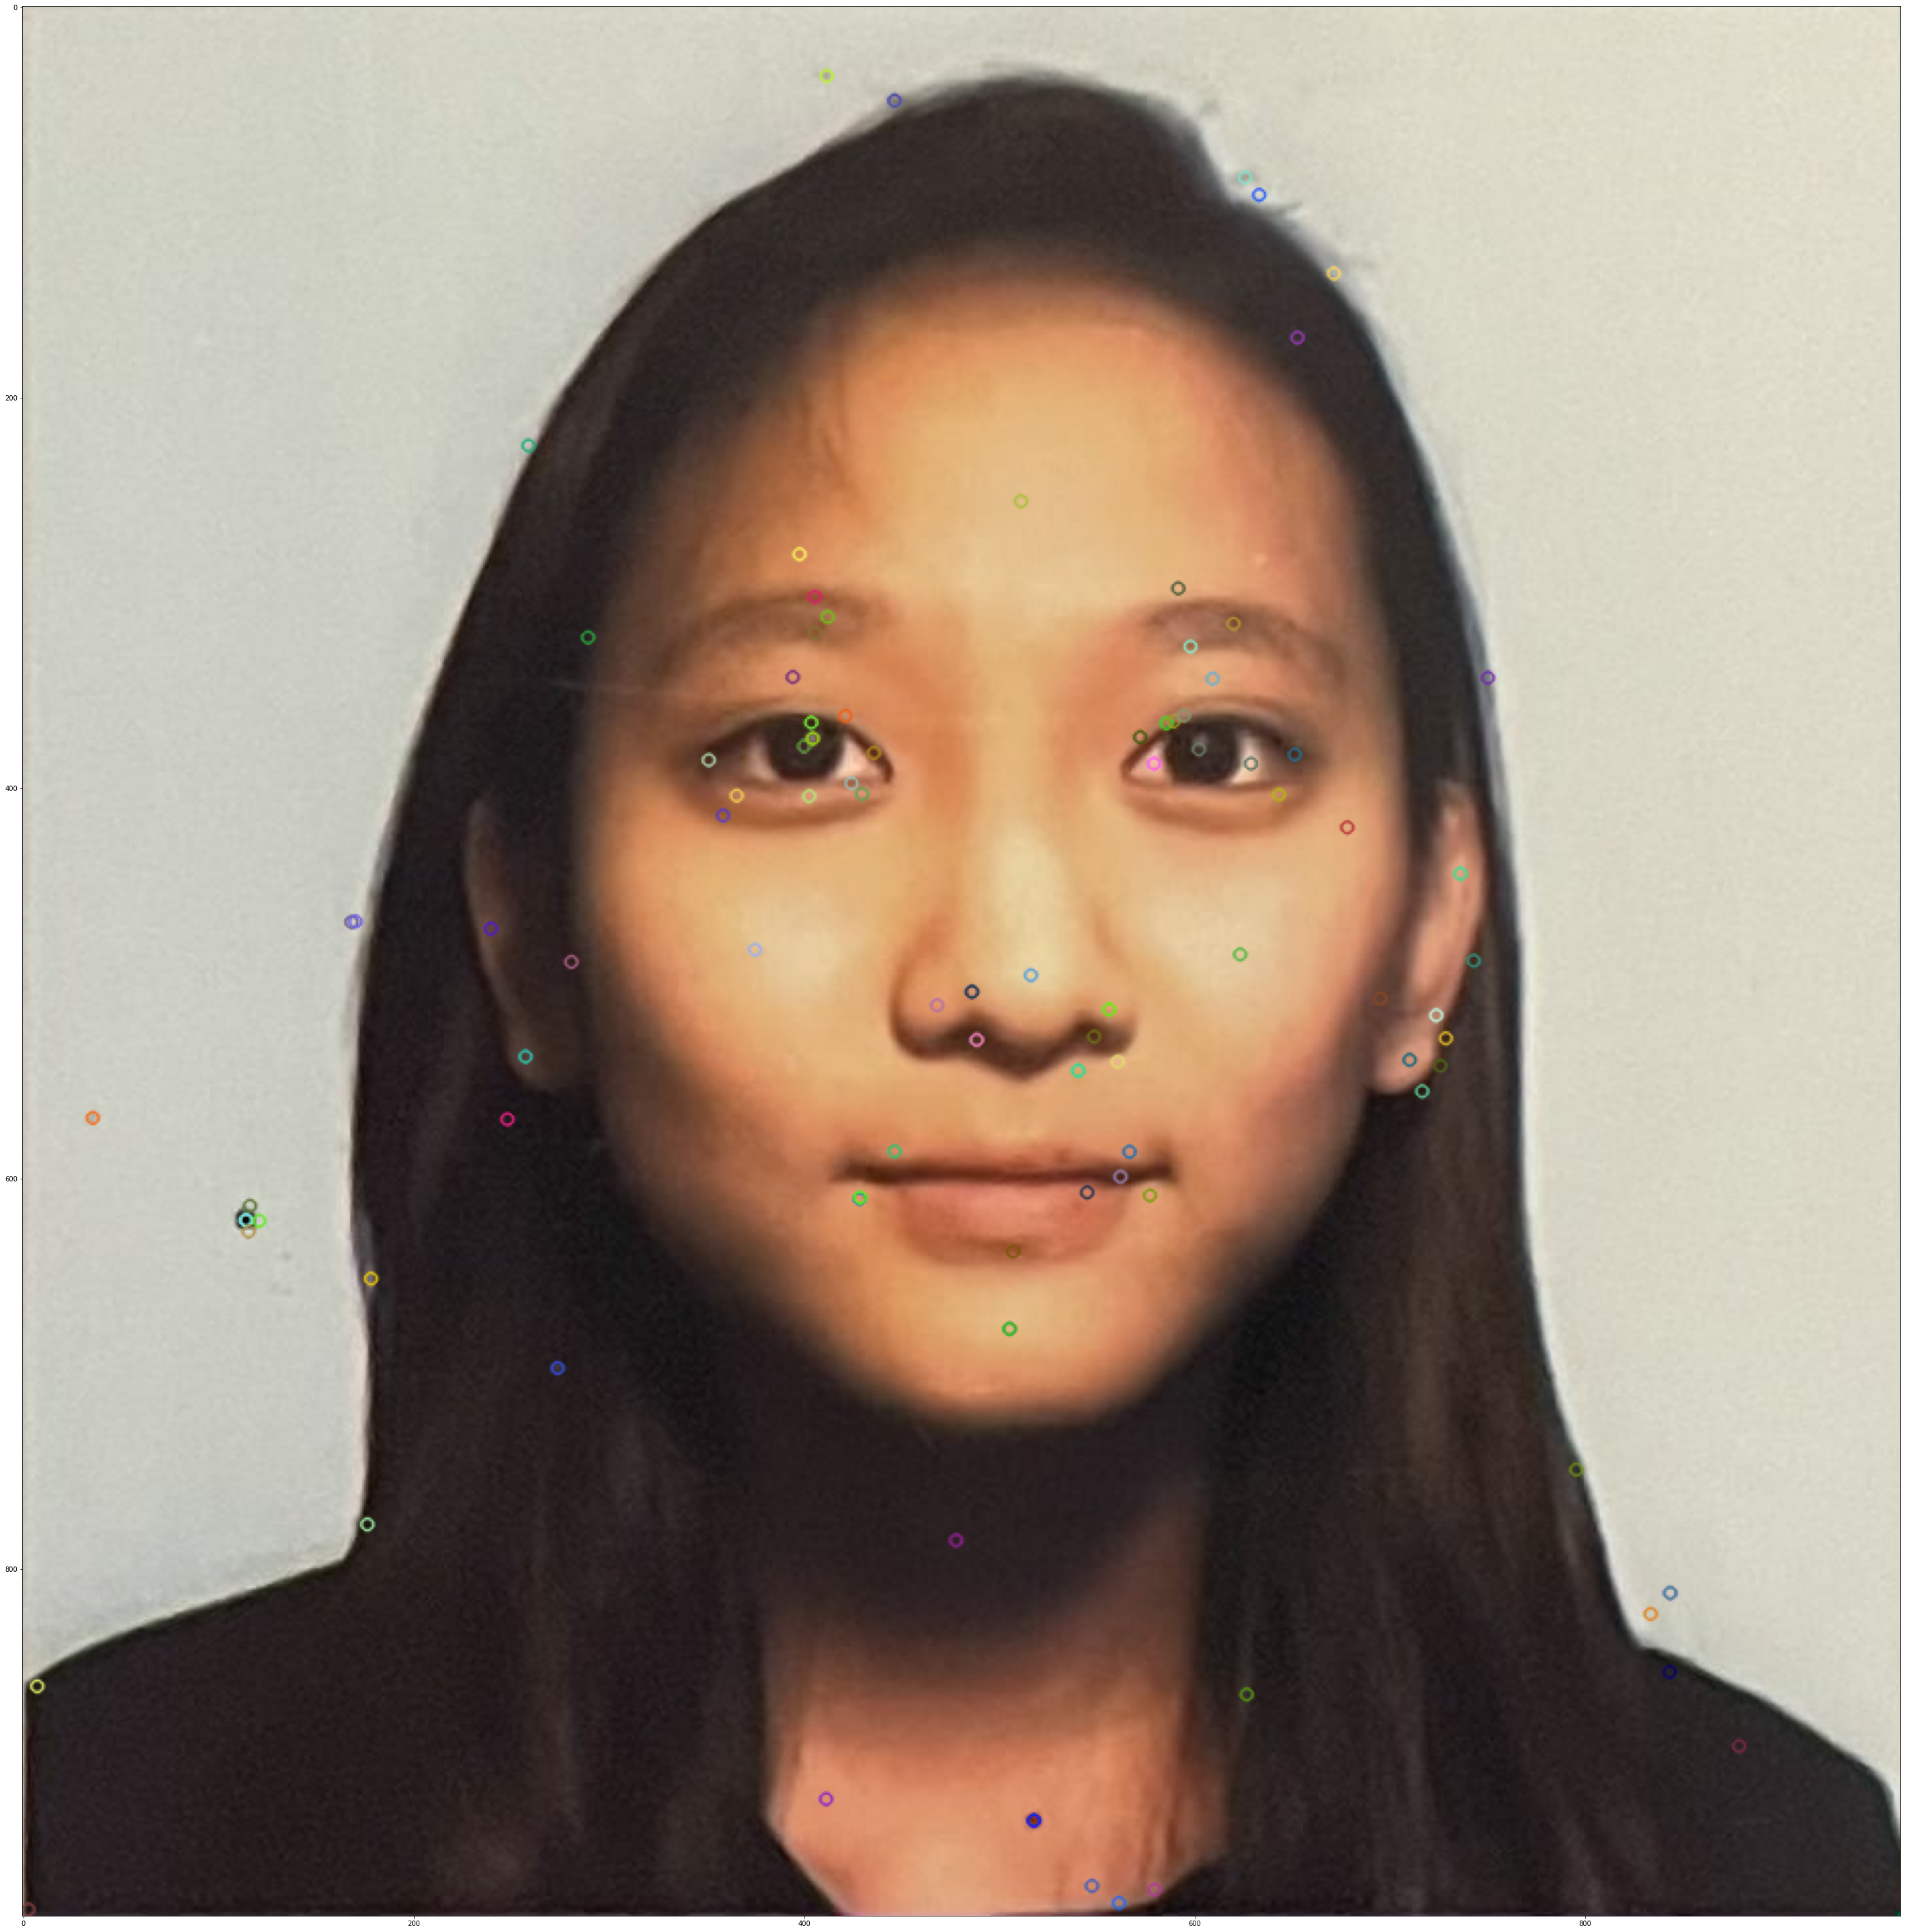

In [ ]:
# converting image from BGR to RGB (OpenCV design)
plt.figure(figsize=(50, 100))
plt.imshow(cv2.cvtColor(img_with_kp, cv2.COLOR_BGR2RGB))

In [ ]:
# BFMatcher with default params
bf = cv2.BFMatcher()

In [ ]:
matches = bf.knnMatch(des1,des2, k=2)

In [ ]:
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])

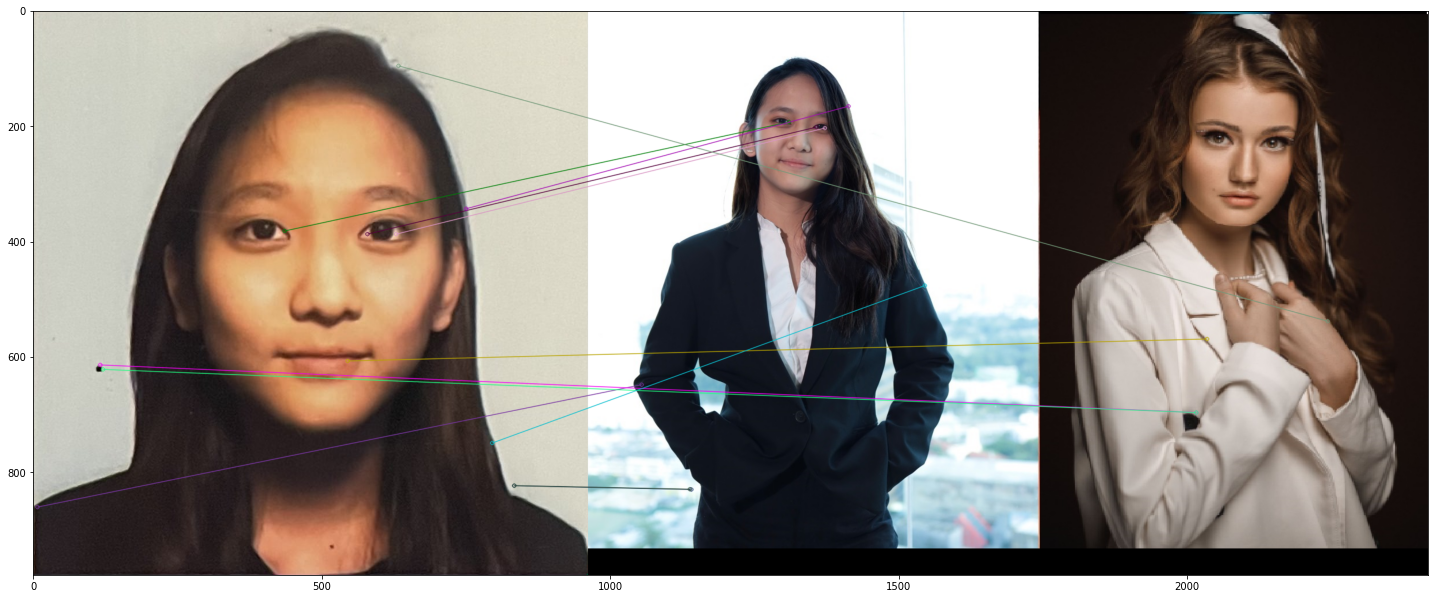

In [51]:
# h1, w1, c1 = img1.shape[:3]
# h2, w2, c2 = img2.shape[:3]
# height = max([h1,h2])
# width = w1 + w2
# out = np.zeros((height, width, 3), np.uint8)
img3 = None
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.figure(figsize=(25, 500))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))